In [42]:
# import some helful libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

In [3]:
# load and read the dataset
dataset = pd.read_excel('final_dataset.xlsx')
dataset.head()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
0,121.849594,145.0,3304.497718,57.484761,125.967102,135.0,1763.033006,41.988487,111.251572,134.0,3330.577657,57.711157,0
1,103.830032,102.0,2152.241390,46.392256,114.606018,121.0,1838.561514,42.878450,95.103455,88.0,3073.705972,55.441013,1
2,116.047089,134.0,2488.556041,49.885429,119.544250,125.0,1193.293666,34.544083,100.909332,119.0,2621.018971,51.195888,0
3,136.331741,139.0,1649.347666,40.612162,147.529755,151.0,1412.353454,37.581291,126.857681,129.0,2512.158838,50.121441,1
4,129.850250,134.0,1940.935613,44.056051,131.718399,139.0,1782.426972,42.218799,101.312119,94.0,2798.758005,52.903289,1


In [35]:
len(dataset)

5702

In [4]:
# look at the distribution of label
dataset['label'].value_counts()

label
1    1939
2    1939
0    1824
Name: count, dtype: int64

In [7]:
# separate index
indx = dataset['label'].value_counts().index
indx

Index([1, 2, 0], dtype='int64', name='label')

In [8]:
# now separate values
val = dataset['label'].value_counts().values
val

array([1939, 1939, 1824], dtype=int64)

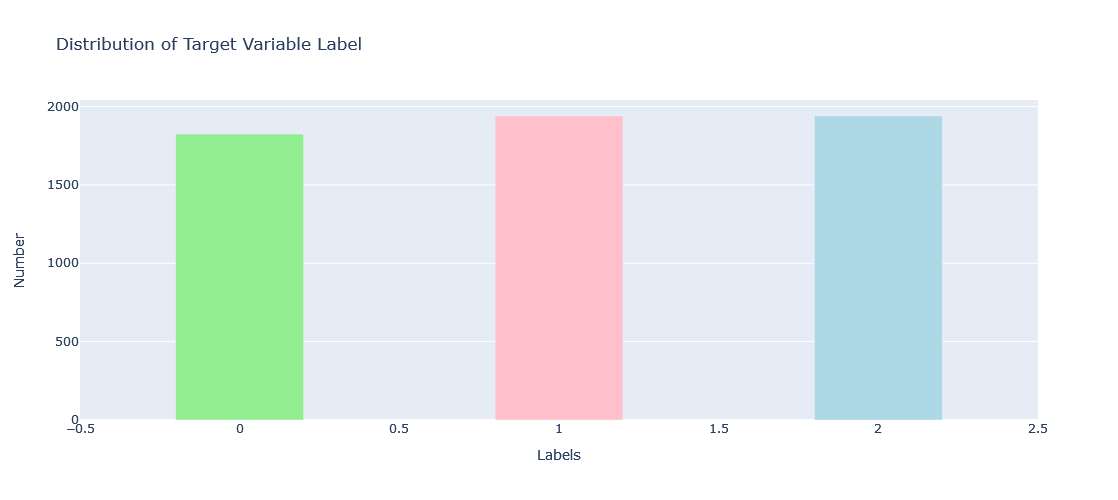

In [34]:
# now plot a bar graph showing distribution of label
fig = go.Figure()

labels = ['Early Blight', 'Late Blight', 'Healthy']
colors = ['pink', 'lightblue', 'lightgreen']
fig.add_trace(go.Bar(x = indx, y = val, hovertext = labels, marker = dict(color = colors), width = 0.4))
fig.update_layout(title = 'Distribution of Target Variable Label', xaxis_title = 'Labels', yaxis_title = 'Number', height = 500)
fig.show()

## Apply ANN

In [37]:
# distribute data into dpeendent and independent data
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [39]:
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [58]:
# now apply ann

# initiate model
model = Sequential()

# add input layer
model.add(Dense(units = 12, input_dim = 12, input_shape = (12, ), activation = None))

# add first inner or hidden layer
model.add(Dense(units = 12, activation = 'relu'))

# add second hidden or dense layer
model.add(Dense(units = 12, activation = 'tanh'))

# add third hidden layer
model.add(Dense(units = 12, activation = 'relu'))

# add output layer
model.add(Dense(units = 3, activation = 'softmax'))

# flatten layer
model.add(Flatten())

# compile
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 12)                156       
                                                                 
 dense_40 (Dense)            (None, 12)                156       
                                                                 
 dense_41 (Dense)            (None, 12)                156       
                                                                 
 dense_42 (Dense)            (None, 12)                156       
                                                                 
 dense_43 (Dense)            (None, 3)                 39        
                                                                 
 flatten_3 (Flatten)         (None, 3)                 0         
                                                                 
Total params: 663 (2.59 KB)
Trainable params: 663 (2.5

In [59]:
# fit the model
model.fit(x_train, y_train, epochs = 5, batch_size = 20, validation_split = 0.2)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible
